# **Efecto de baja frecuencia de muestreo en la FFT**

*Juan Daniel Gonzalez*

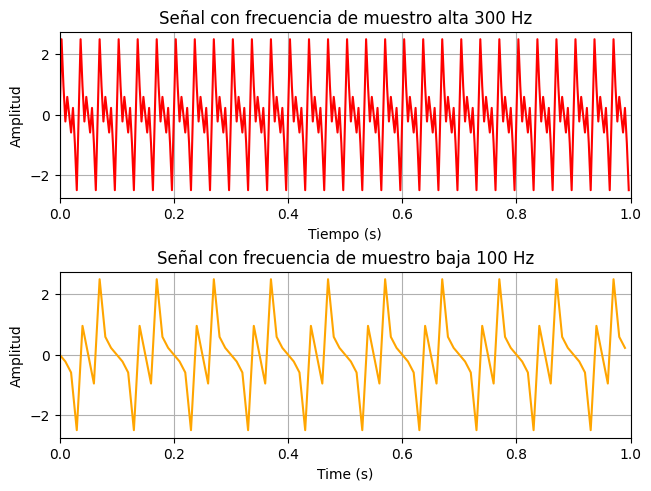

In [17]:
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 300
low_sample_rate = 100

freqs = [30,60,90]

t = np.linspace(0,1,sample_rate, endpoint=False)
low_t = np.linspace(0,1,low_sample_rate, endpoint=False)

signal = np.sum([np.sin(2 * np.pi * f * t) for f in freqs], axis=0)
signal_less_resolution = np.sum([np.sin(2 * np.pi * f * low_t) for f in freqs], axis=0)


fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(t, signal, color="red")
axs[0].set_title(f"Señal con frecuencia de muestro alta {sample_rate} Hz" )
axs[0].set_xlim(0, 1)
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].grid(True)



axs[1].plot(low_t, signal_less_resolution, color="orange")
axs[1].set_title(f"Señal con frecuencia de muestro baja {low_sample_rate} Hz" )
axs[1].set_xlim(0, 1)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitud')
axs[1].grid(True)

plt.show()

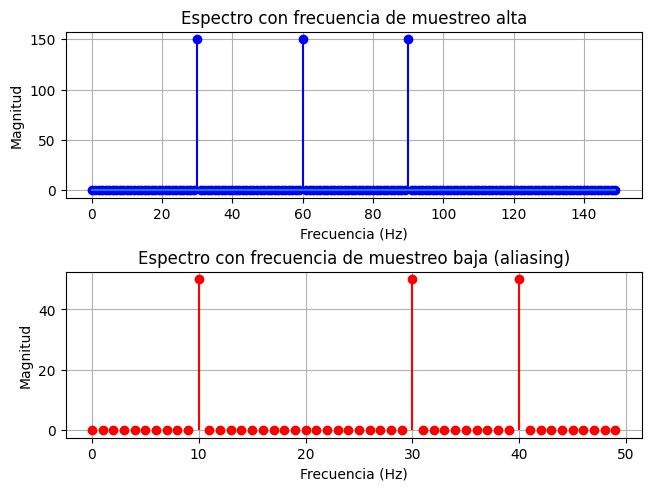

In [19]:
#FFT con frecuencia alta
freq = np.fft.fftfreq(len(signal), 1/sample_rate)
fft = np.fft.fft(signal)
fft_magnitude = np.abs(fft)

#FFT con frecuencia baja
freq_low = np.fft.fftfreq(len(signal_less_resolution), 1/low_sample_rate)
fft_low = np.fft.fft(signal_less_resolution)
fft_low_magnitude = np.abs(fft_low)

fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].stem(freq[:len(freq)//2], fft_magnitude[:len(freq)//2],
         linefmt="blue", markerfmt="bo", basefmt="")
axs[0].set_title("Espectro con frecuencia de muestreo alta")
axs[0].set_xlabel("Frecuencia (Hz)")
axs[0].set_ylabel("Magnitud")
axs[0].grid(True)



axs[1].stem(freq_low[:len(freq_low)//2], fft_low_magnitude[:len(freq_low)//2],
         linefmt="red", markerfmt="ro", basefmt=" ")
axs[1].set_title("Espectro con frecuencia de muestreo baja (aliasing)" )
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Magnitud")
axs[1].grid(True)

plt.show()



Como podemos ver al usar una frecuencia de muestreo ($f_s$) menor de la recomendada, no cumpliendo con lo propuesto por el teorema de Nyquist obtenemos un efecto de aliasing donde las frecuencias por encima de $f_s/2$ se reflejan dentro del rango de $0$ a $fs/2$, conocido como el rango de frecuencias de Nyquist, este reflejo hace que las frecuencias se mezclen con otras creando frecuencias falsas o alias.